# Time series - Sparse representation Coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.decomposition import DictionaryLearning

FTS-SRC

The Dictionary Matrix D N*K can the sparse representation of the original signal X = D * $\alpha$


A optimisation problme to be solved by a pursuit algorithm or the orthogonal matching pursuit

Sparsity level \tau



Dictionary learning without knowing atoms using skilearn

In [2]:
# Implementation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import DictionaryLearning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import pandas as pd

def generate_random_data(num_samples, timesteps):
    data_matrix = np.zeros((timesteps, num_samples))

    for i in range(num_samples):
        signal = np.sin(2 * np.pi * np.random.uniform(1, 10) * np.linspace(0, 2*np.pi, timesteps))
        noise = 0.1 * np.random.normal(size=timesteps)
        noisy_signal = signal + noise
        data_matrix[:, i] = noisy_signal

    return data_matrix

def custom_scorer(y_true, y_pred):
    return -np.mean((y_true - y_pred) ** 2)

def create_sliding_windows(data, window_size, stride):
    num_samples = len(data)
    num_windows = ((num_samples - window_size) // stride) + 1
    X_matrix = np.zeros((window_size, num_windows))

    for i in range(num_windows):
        start = i * stride
        end = start + window_size
        window = data[start:end]
        X_matrix[:, i] = window.T

    return X_matrix

def read_csv_and_preprocess(file_path, data_type_mapping, column_mapping=None):
    try:
        # Read CSV file to DataFrame with date parsing
        df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)
        if column_mapping:
            df = df.rename(columns=column_mapping)
        # Process 'Vol.' column
        # df['Volume'] = df['Volume'].str.replace('M', '').astype(float)
        df['Change_Percentage'] = df['Change_Percentage'].str.replace('%', '').astype(float)
        numeric_columns = ['Price', 'Open', 'High', 'Low']
        df[numeric_columns] = df[numeric_columns].replace(',', '', regex=True).astype(float)
        df = df.astype(data_type_mapping)
        print("Successfully read the CSV file and preprocessed the DataFrame.")
        return df

    except Exception as e:
        print(f"Error occurred: {str(e)}")
        return None


# def find_best_params(X, param_grid, transform_algorithm='omp', cv=5, random_state=None):
#     """
#     Find the best parameters for Dictionary Learning using GridSearchCV.

#     Parameters:
#     - X: Input data matrix.
#     - param_grid: Dictionary specifying the parameters to search, e.g., {'n_components': [5, 10, 15], 'transform_alpha': [0.01, 0.1, 1.0]}.
#     - transform_algorithm: Algorithm used for sparse coding, default is 'lasso_lars'.
#     - cv: Number of cross-validation folds, default is 5.
#     - random_state: Random seed for reproducibility, default is None.

#     Returns:
#     - best_params: Dictionary containing the best parameters found.
#     """

#     # Create DictionaryLearning model
#     dict_learner = DictionaryLearning(transform_algorithm=transform_algorithm, random_state=random_state)
#     grid_search = GridSearchCV(dict_learner, param_grid=param_grid, cv=cv)
#     grid_search.fit(X)

#     # Get the best parameters
#     best_params = grid_search.best_params_

#     return best_params


# num_samples = 5
# timesteps = 50  
# random_data_matrix = generate_random_data(num_samples, timesteps)
# plt.figure(figsize=(12, 6))
# for i in range(num_samples):
#     plt.plot(random_data_matrix[:, i], label=f'Series {i + 1}')

# plt.title('Generated Random Time Series Data')
# plt.legend()
# plt.show()

# flattened_data = np.reshape(random_data_matrix, (timesteps, -1))

# print("Shape of Flattened Data Matrix:", flattened_data.shape)


Read the data and learn from it

Successfully read the CSV file and preprocessed the DataFrame.


/tmp/ipykernel_916/3630718455.py:39: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


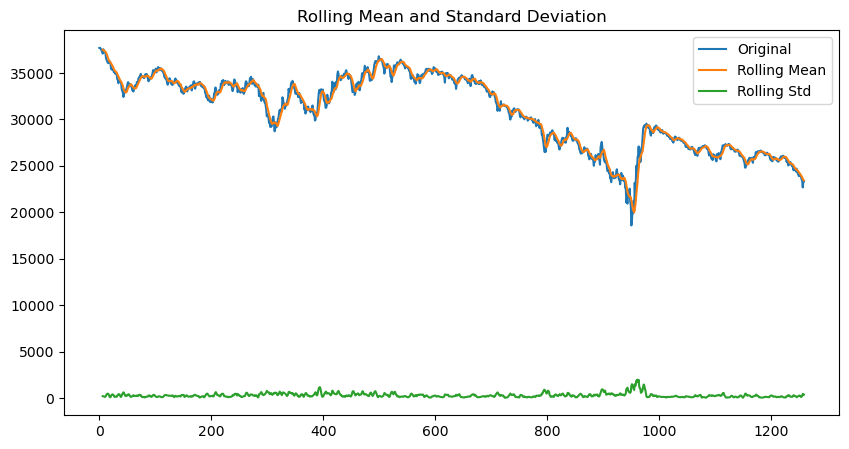

ADF Statistic: -1.540868861099524
p-value: 0.5132060163630415
Critical Values: {'1%': -3.4355964295197743, '5%': -2.863856825923603, '10%': -2.5680035060041626}
Result: The time series is not stationary.


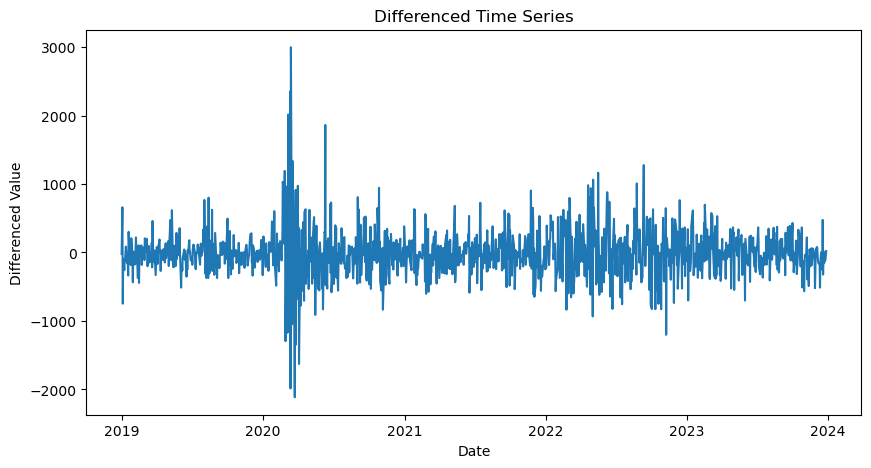

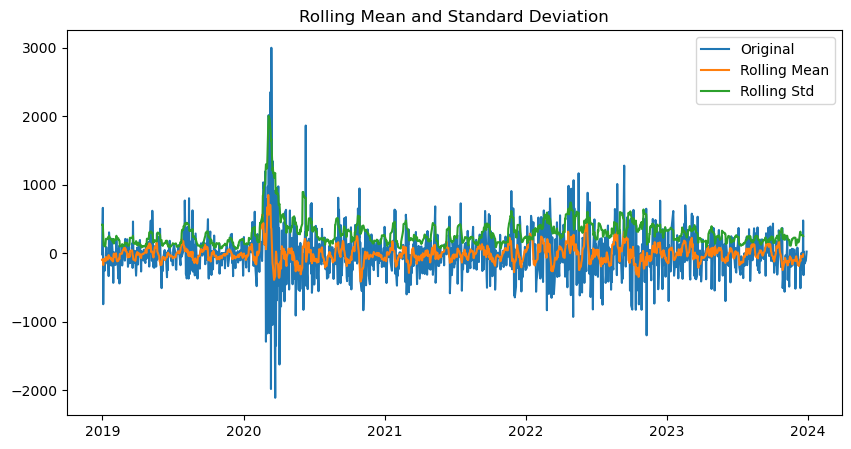

ADF Statistic: -10.711360553771282
p-value: 3.3254441407343245e-19
Critical Values: {'1%': -3.4355964295197743, '5%': -2.863856825923603, '10%': -2.5680035060041626}
Result: The time series is stationary.


In [3]:
# stationary_test
from statsmodels.tsa.stattools import adfuller

# Define a function for stationary testing
def stationary_test(time_series):
    # Convert the NumPy array to a Pandas Series
    time_series = pd.Series(time_series)

    # Visualize rolling mean and rolling standard deviation
    rolmean = time_series.rolling(window=7).mean()
    rolstd = time_series.rolling(window=7).std()

    plt.figure(figsize=(10, 5))
    plt.plot(time_series, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()

    # Perform Dickey-Fuller test for stationarity
    result = adfuller(time_series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    
    # Determine the result of the stationarity test
    if result[1] <= 0.05:
        print('Result: The time series is stationary.')
    else:
        print('Result: The time series is not stationary.')

        
csv_file_path = "../Data/Dow Jones Industrial Average Historical Data - Daily.csv"
data_type_mapping = {
    'Date': 'datetime64[ns]',
    'Price': 'float64',
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Change_Percentage': 'float64',
}
column_mapping = {
    'Vol.': 'Volume',
    'Change %': 'Change_Percentage',
}

# True data
data_time_series = read_csv_and_preprocess(csv_file_path, data_type_mapping, column_mapping)
price_series = data_time_series["Price"].values
stationary_test(price_series)

date_timestamps_T = data_time_series["Date"].values
time_series = pd.Series(price_series, index=date_timestamps_T)
differenced_series = time_series.diff().dropna()

# 可视化差分后的时间序列
plt.figure(figsize=(10, 5))
plt.plot(differenced_series)
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

stationary_test(differenced_series)


In [4]:
# window_size = 5
# stride = 2
# timesteps = 50  
# n_components = 15  # key component size
# transform_alpha = 0.01
tol = 1e-8
# max_iter = 1000
delta = 0.6
# tau = 2

csv_file_path = "../Data/Dow Jones Industrial Average Historical Data - Daily.csv"
data_type_mapping = {
    'Date': 'datetime64[ns]',
    'Price': 'float64',
    'Open': 'float64',
    'High': 'float64',
    'Low': 'float64',
    'Change_Percentage': 'float64',
}
column_mapping = {
    'Vol.': 'Volume',
    'Change %': 'Change_Percentage',
}

# True data
data_time_series = read_csv_and_preprocess(csv_file_path, data_type_mapping, column_mapping)
price_series = data_time_series["Price"].values

# Simulation data
# np.random.seed(42)
# price_series = np.random.uniform(100, 200, 200)


N = price_series.size
N_H = int(delta*price_series.size)
N_T = N - N_H
price_series_H = price_series[:N_H]
price_series_T = price_series[N_H:]

# X_H_matrix = create_sliding_windows(price_series_H, window_size, stride)
# X_T_matrix = create_sliding_windows(price_series_T, window_size, stride)


Successfully read the CSV file and preprocessed the DataFrame.


/tmp/ipykernel_916/3630718455.py:39: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


In [5]:
# random_data_matrix = generate_random_data(num_samples, timesteps).T
# (N,J) = random_data_matrix.shape
# dl = DictionaryLearning(n_components = n_components, tol=tol, max_iter = max_iter, transform_alpha=transform_alpha)
# A_H = dl.fit_transform(X_H_matrix) # Number samples* Number features K * C1
# learned_dictionary = dl.components_ # n_components, n_features W * C1

In [6]:
import numpy as np
from scipy.optimize import minimize

# 稀疏性的权衡问题
def dictionary_learning(X, w, s, K, t):
    """
    Perform dictionary learning on the input time series X.
    """
    windows = create_sliding_windows(X, w, s)
    c_prime = windows.shape[1]
    
    # Initialize dictionary and coefficients
    D = np.random.rand(w, K)
    A = np.random.rand(K, c_prime)

    def objective(params):
        D = params[:w * K].reshape((w, K))
        A = params[w * K:].reshape((K, c_prime))
        return np.linalg.norm(windows - np.dot(D, A), 'fro')**2

    def sparsity_constraint(A):
        return np.sum(np.abs(A) > 1e-5) - t
    
    def combined_objective(params):
        D = params[:w * K].reshape((w, K))
        A = params[w * K:].reshape((K, c_prime))
        return objective(params) + sparsity_constraint(A)

    result = minimize(combined_objective, np.concatenate((D.flatten(), A.flatten())), method='COBYLA')

    # Retrieve the learned dictionary
    learned_D = result.x[:w * K].reshape((w, K))
    sparse_A = result.x[w * K:].reshape((K, c_prime))
    return learned_D,sparse_A

w = 30  # window size
s = 2   # step size
K = 200  # number of atoms in the dictionary
t = 4   # sparsity level

learned_dictionary, sparse_A = dictionary_learning(price_series_H, w, s, K, t)

In [122]:
# import pickle
# import os
# from datetime import datetime

# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# file_name = f'dictionary_learning_objects_{timestamp}.pkl'

# # Decomment it if want to save
# with open(file_name, 'wb') as file:
#     pickle.dump({'A_H': sparse_A, 'learned_dictionary': learned_dictionary, 'timestamp': timestamp}, file)
# print(f"Objects saved to file: {file_name}")

In [123]:
# try:
#     with open(file_name, 'rb') as file:
#         loaded_objects = pickle.load(file)

#     # Access the loaded objects
#     loaded_A_H = loaded_objects['A_H']
#     loaded_learned_dictionary = loaded_objects['learned_dictionary']

# except FileNotFoundError:
#     print("Error: File 'dictionary_learning_objects.pkl' not found.")
# except EOFError:
#     print("Error: Failed to load pickled objects. The file might be empty or corrupted.")
# except Exception as e:
#     print(f"An unexpected error occurred: {e}")

In [124]:
import numpy as np
from scipy.optimize import minimize

def sparse_coding(X, D, t):
    objective_function = lambda alpha: np.linalg.norm(X - np.dot(D, alpha))**2
    sparsity_constraint = {'type': 'ineq', 'fun': lambda alpha: t - np.count_nonzero(alpha)}
    result = minimize(objective_function, np.zeros(D.shape[1]), constraints=sparsity_constraint)
    alpha_T_i = result.x
    return alpha_T_i

def sparse_representation_matrix(X_T, D, w, s, t):
    """
    Calculate sparse representation matrix A_T for the entire test set.

    Parameters:
    - X_T: Test set matrix
    - D: Dictionary matrix
    - w: Window size
    - s: Step size for sliding windows
    - t_j: Sparsity constraint

    Returns:
    - A_T: Sparse representation matrix for the test set
    """
        
    K, c = D.shape[1], int((X_T.shape[0] - w) / s) + 1
    A_T = np.zeros((K, c))

    times = 0
    for i in range(0, X_T.shape[0] - w + 1, s):
        window = X_T[i:i+w]
        alpha_T_i = sparse_coding(window, D, t)
        A_T[:, times] = alpha_T_i
        times =times+1

    return A_T

# Assuming X_T is your test set matrix, D is the dictionary matrix, w is the window size, s is the step size, and t_j is the sparsity constraint
# A_T = sparse_representation_matrix(X_T, D, w, s, t_j)

X_H_matrix = create_sliding_windows(price_series_H, w, s)
X_T_matrix = create_sliding_windows(price_series_T, w, s)
A_T = sparse_representation_matrix(price_series_T, learned_dictionary,w, s, t)


In [125]:
reconstructed_window = np.dot(learned_dictionary, A_T)
reconstructed_window.shape

(6, 250)

In [126]:
# Version 2 for
# final_reconstruction = np.zeros(N_T)
# for index in range(N_T):
#     temp = []
#     for win in range(reconstructed_window.shape[1]):
#         start_index = win * s
#         end_index = start_index + w
#         if index<end_index and index>=start_index:
#             # print ("index"+str(index))
#             # print ("start_index"+str(start_index))
#             # print ("win"+str(win))
#             temp.append(reconstructed_window[index-start_index,win])
        
#     temp = np.array(temp)
#     final_reconstruction[index] = np.mean(temp)

# w = 5  # window size
# s = 3   # step size
# K = 50  # number of atoms in the dictionary
# t = 10   # sparsity level
# Version 1 for only
final_reconstruction = np.zeros(N_T)
for index in range(N_T):
    start_indices = np.arange(reconstructed_window.shape[1]) * s
    end_indices = start_indices + w
    print (str(start_indices) + " " + str(end_indices))
    mask = np.logical_and(index >= start_indices, index < end_indices)
    temp = reconstructed_window[index - start_indices[mask], mask]
    final_reconstruction[index] = np.mean(temp)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398 400 402 404 406 408 410 412 414 416 418 420 422 424 426 428 430
 432 434 436 438 440 442 444 446 448 450 452 454 456 458 460 462 464 466
 468 470 472 474 476 478 480 482 484 486 488 490 49

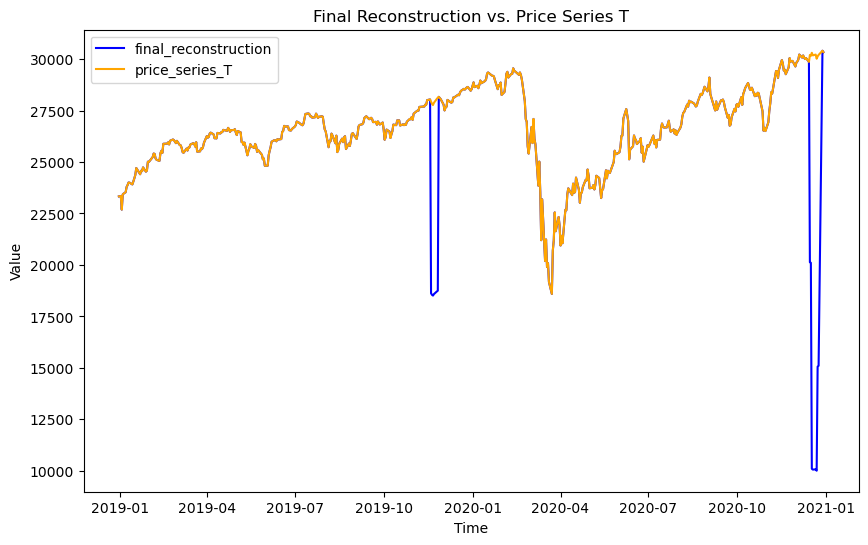

In [127]:
date_timestamps_T = data_time_series["Date"].values[N_H:]
price_series_T_df = pd.DataFrame({'Date': date_timestamps_T, 'Price': price_series_T})
final_reconstruction_df = pd.DataFrame({'Date': date_timestamps_T, 'Price': final_reconstruction})

plt.figure(figsize=(10, 6))
plt.plot(final_reconstruction_df["Date"], final_reconstruction_df['Price'], label='final_reconstruction', color='blue')
plt.plot(price_series_T_df["Date"], price_series_T_df['Price'], label='price_series_T', color='orange')

plt.title('Final Reconstruction vs. Price Series T')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [128]:
merged_df = pd.merge(final_reconstruction_df, price_series_T_df, on='Date', suffixes=('_final_reconstruction', '_price_series_T'))

relative_error = (merged_df['Price_final_reconstruction'] - merged_df['Price_price_series_T']) / merged_df['Price_price_series_T']
squared_relative_error = relative_error**2
rmsre = np.sqrt(np.mean(squared_relative_error))
rmsre

0.07926581093424478

In [129]:
import plotly.express as px
date_timestamps_T = data_time_series["Date"].values[N_H:]
price_series_T_df = pd.DataFrame({'Date': date_timestamps_T, 'Price': price_series_T})
final_reconstruction_df = pd.DataFrame({'Date': date_timestamps_T, 'Price': final_reconstruction})

merged_df = pd.merge(final_reconstruction_df, price_series_T_df, on='Date', suffixes=('_final_reconstruction', '_price_series_T'))

fig = px.line(merged_df, x='Date', y=['Price_final_reconstruction', 'Price_price_series_T'],
              labels={'value': 'Value', 'Date': 'Time'}, title='Final Reconstruction vs. Price Series T')

fig.show()

In [98]:
price_series_T_df.shape

(504, 2)

In [111]:
merged_df = pd.merge(final_reconstruction_df, price_series_T_df, on='Date', suffixes=('_final_reconstruction', '_price_series_T'))
merged_df['Price_Difference'] = merged_df['Price_final_reconstruction'] - merged_df['Price_price_series_T']
merged_df

,Date,Price_final_reconstruction,Price_price_series_T,Price_Difference
0,2019-12-30,28462.14,28462.14,-1.554399e-07
1,2019-12-27,28645.26,28645.26,1.125118e-07
2,2019-12-26,28621.39,28621.39,-2.048910e-08
3,2019-12-24,28515.45,28515.45,2.894012e-08
4,2019-12-23,28551.53,28551.53,7.169365e-08
...,...,...,...,...
247,2019-01-07,23531.35,23531.35,2.338493e-08
248,2019-01-04,23433.16,23433.16,-5.222319e-08
249,2019-01-03,22686.22,22686.22,-7.281051e-08
250,2019-01-02,23346.24,23346.24,7.497874e-08


In [112]:
merged_df.max()

Date                          2019-12-30 00:00:00
Price_final_reconstruction               28645.26
Price_price_series_T                     28645.26
Price_Difference                              0.0
dtype: object

In [144]:
final_reconstruction_df

,Date,Price
0,2020-12-29,30335.67
1,2020-12-28,30403.97
2,2020-12-24,30199.87
3,2020-12-23,30129.83
4,2020-12-22,30015.51
...,...,...
499,2019-01-07,23531.35
500,2019-01-04,23433.16
501,2019-01-03,22686.22
502,2019-01-02,23346.24
